In [220]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "NanumGothic"

In [221]:
cw = pd.read_csv("C:\\Users\\fhdns\\Downloads\\cw.csv", encoding='cp949')

사용할 변수들만 추려서 정리.

In [295]:
cw2 = cw.drop(['도로명', '소재지도로명주소', '소재지지번주소', '횡단보도관리번호', '위도',
               '경도', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드', '제공기관명'], axis = 1)

데이터의 정보.

In [223]:
cw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도명         50000 non-null  object 
 1   시군구명        50000 non-null  object 
 2   횡단보도종류      50000 non-null  int64  
 3   자전거횡단도겸용여부  50000 non-null  object 
 4   고원식적용여부     50000 non-null  object 
 5   차로수         50000 non-null  int64  
 6   횡단보도폭       50000 non-null  float64
 7   횡단보도연장      50000 non-null  float64
 8   보행자신호등유무    50000 non-null  object 
 9   보행자작동신호기유무  50000 non-null  object 
 10  음향신호기설치여부   50000 non-null  object 
 11  녹색신호시간      12630 non-null  float64
 12  적색신호시간      11246 non-null  float64
 13  교통섬유무       50000 non-null  object 
 14  보도턱낮춤여부     50000 non-null  object 
 15  점자블록유무      50000 non-null  object 
 16  집중조명시설유무    50000 non-null  object 
dtypes: float64(4), int64(2), object(11)
memory usage: 6.5+ MB


In [224]:
cw2.head()

,시도명,시군구명,횡단보도종류,자전거횡단도겸용여부,고원식적용여부,차로수,횡단보도폭,횡단보도연장,보행자신호등유무,보행자작동신호기유무,음향신호기설치여부,녹색신호시간,적색신호시간,교통섬유무,보도턱낮춤여부,점자블록유무,집중조명시설유무
0,경기도,의정부시,1,Y,N,3,4.0,10.5,Y,N,N,0.0,0.0,N,Y,Y,N
1,경기도,의정부시,4,N,N,7,6.0,23.5,Y,N,Y,28.0,124.0,Y,Y,Y,Y
2,경기도,의정부시,1,Y,N,4,6.0,14.0,Y,N,N,19.0,79.0,N,Y,Y,Y
3,경기도,의정부시,1,Y,N,7,10.0,24.0,Y,N,Y,30.0,118.0,N,Y,Y,Y
4,경기도,의정부시,1,Y,N,7,8.0,32.0,Y,N,Y,35.0,116.0,N,Y,Y,Y


시도명 변수를 이용해 워드클라우드를 그리기 위한 라이브러리 설치.

In [227]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import numpy as np
from PIL import *
from collections import Counter

시도명 변수들의 빈도수를 정리해 c_city라는 데이터셋에 저장한 후 워드클라우드 생성.

In [228]:
c_city = Counter(cw2['시도명'])

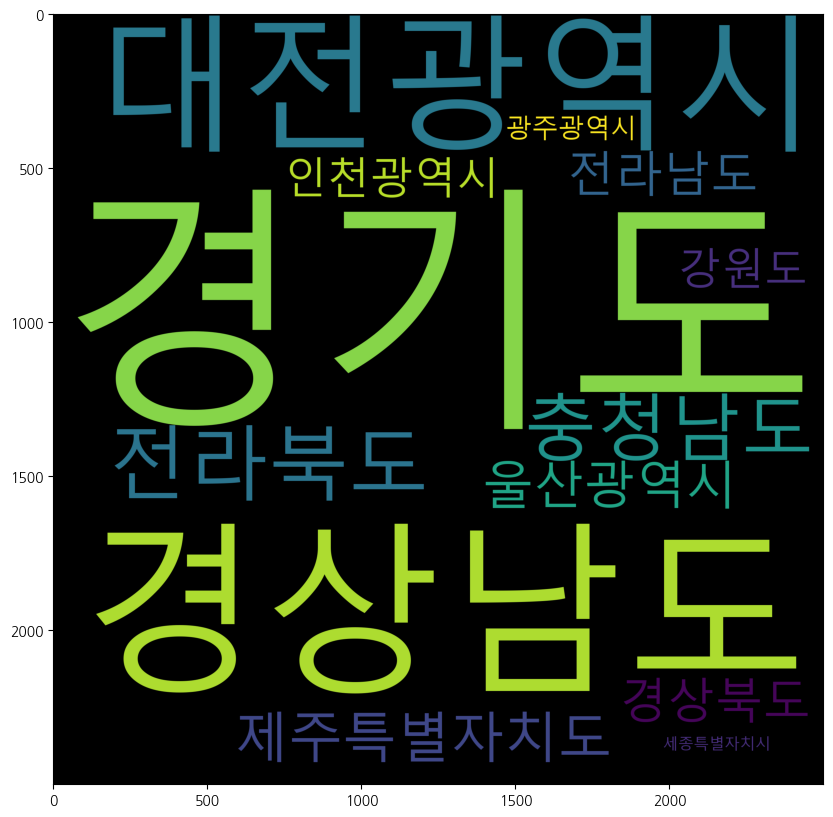

In [229]:
wc = WordCloud(font_path='malgun', width=500, height=500, scale=5.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_city)
plt.figure(figsize = (10, 10))
plt.imshow(gen)

횡단보도종류를 시각화.

1) 일반형 : 단일로에 설치된 횡단보도

2) 대각선 : 노면에 대각선 방향으로 가로질러 설치하는 횡단보도

3) 스테거드 : 보행자가 도로를 두 번 나누어 횡단하게하는 횡단보도

4) 도류화 : 교차로 내 교통섬이 포함된 횡단보도

99) 기타 : 기타 횡단보도 종류

<AxesSubplot:xlabel='횡단보도종류', ylabel='count'>

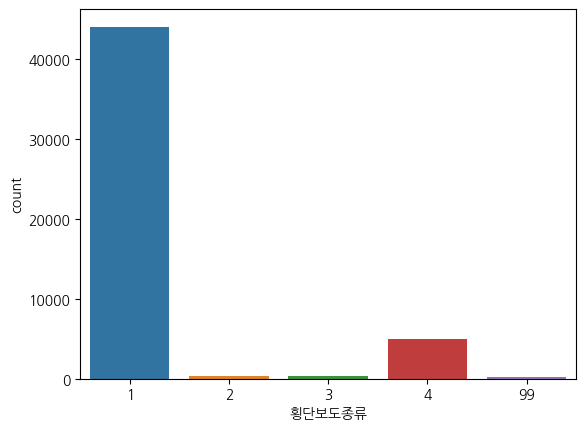

In [230]:
sns.countplot(data = cw2, x='횡단보도종류')

자전거횡단도겸용여부를 시각화. 결측치 값이 공백으로 기입되어 있었기 때문에 공백에 해당하는 값을 삭제하고 표시.

In [231]:
cw2['자전거횡단도겸용여부'].unique()

array(['Y', 'N', ' '], dtype=object)

<AxesSubplot:xlabel='자전거횡단도겸용여부', ylabel='count'>

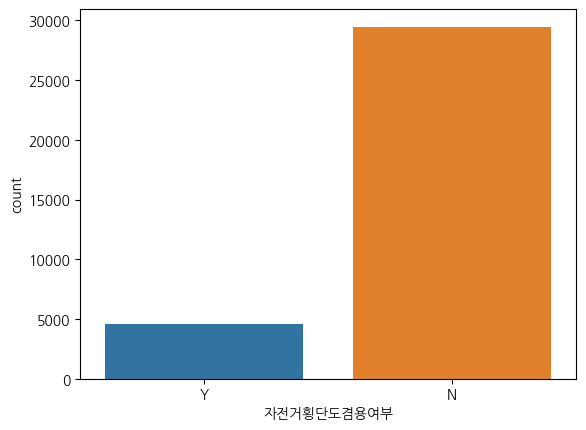

In [233]:
idx = cw2[cw2['자전거횡단도겸용여부']==' '].index
cw3 = cw2.drop(idx)
sns.countplot(data = cw3, x='자전거횡단도겸용여부')

고원식 횡단보도 적용여부를 시각화.

<AxesSubplot:xlabel='고원식적용여부', ylabel='count'>

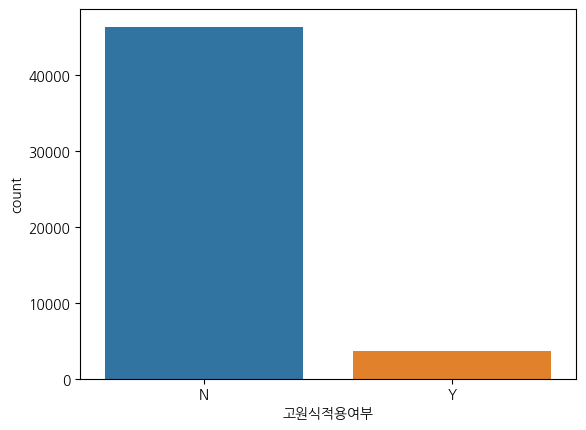

In [235]:
sns.countplot(data = cw2, x='고원식적용여부')

차로의 수를 시각화.

<AxesSubplot:xlabel='차로수', ylabel='count'>

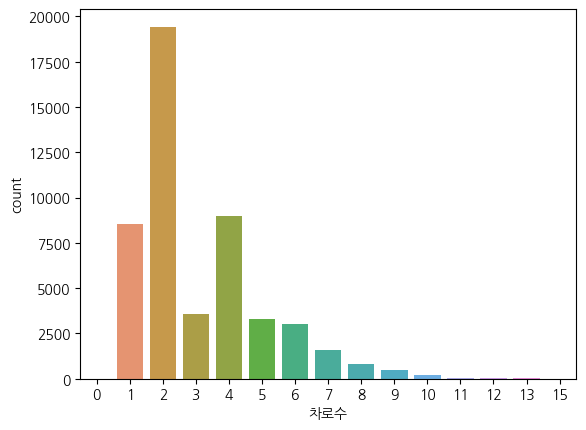

In [236]:
sns.countplot(data = cw2, x='차로수')

횡단보도폭의 도수분포를 나타내기 위해 이상치 처리. 극단적으로 큰 값만 배제하고 시각화.

In [274]:
cw_wth = cw2[['횡단보도폭']]

In [275]:
cw_wth.describe()

,횡단보도폭
count,50000.000000
mean,5.328377
std,4.413200
min,0.000000
25%,4.000000
50%,5.000000
75%,6.100000
max,839.000000


<AxesSubplot:>

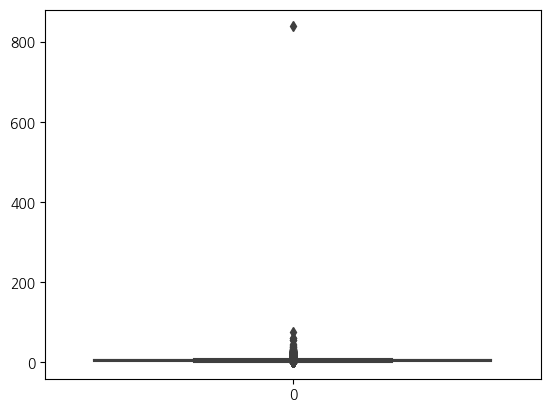

In [276]:
sns.boxplot(data = cw_wth['횡단보도폭'])

In [277]:
cw_wth = cw_wth[cw_wth['횡단보도폭'] < 20]

D:\rl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='횡단보도폭', ylabel='Density'>

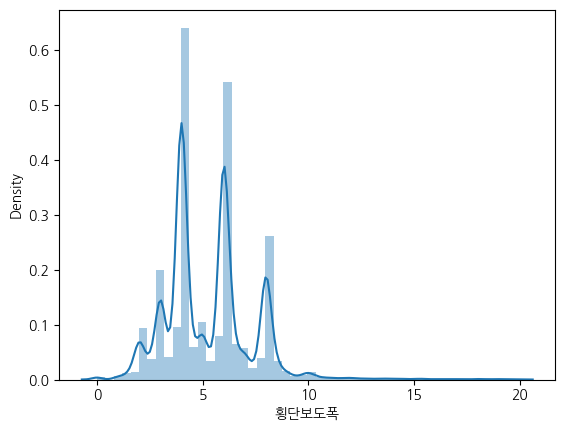

In [278]:
sns.distplot(cw_wth['횡단보도폭'])

횡단보도의 길이를 시각화. 이 역시 극단적인 이상치를 제거하고 도수분포를 생성.

In [279]:
cw_et = cw2[['횡단보도연장']]

In [280]:
cw_et.describe()

,횡단보도연장
count,50000.000000
mean,12.186544
std,14.690608
min,0.000000
25%,7.000000
50%,10.000000
75%,15.500000
max,2852.000000


In [281]:
cw_et = cw_et[cw_et['횡단보도연장'] < 200]

<AxesSubplot:>

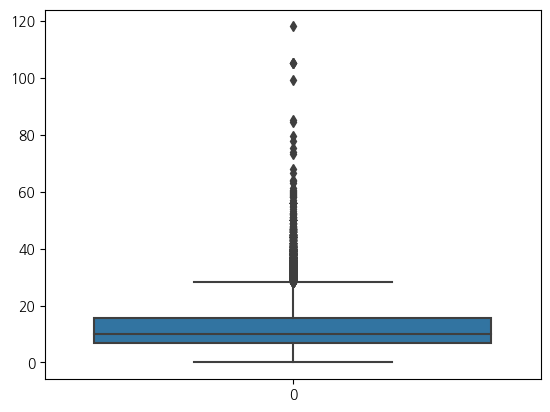

In [282]:
sns.boxplot(data = cw_et['횡단보도연장'])

D:\rl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='횡단보도연장', ylabel='Density'>

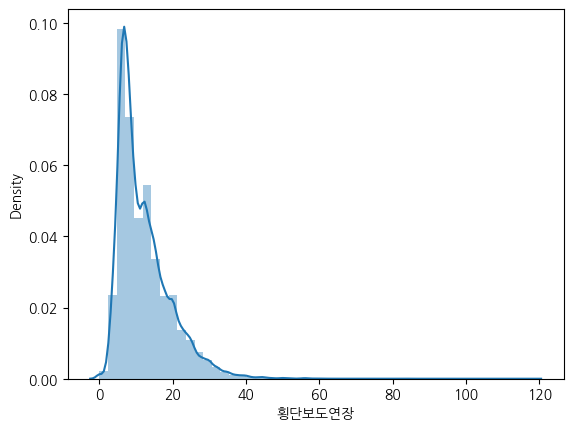

In [283]:
sns.distplot(cw_et['횡단보도연장'])

보행자 신호등 유무를 시각화.

<AxesSubplot:xlabel='보행자신호등유무', ylabel='count'>

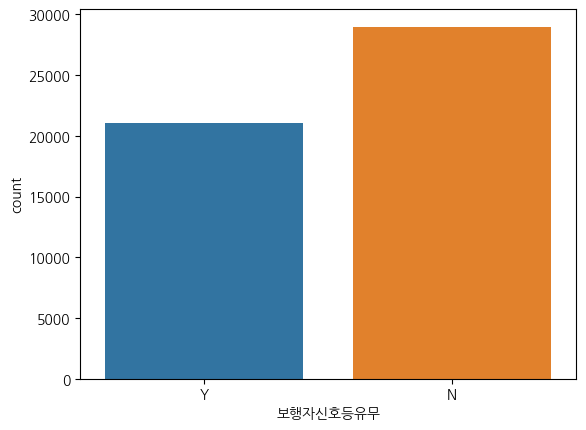

In [247]:
sns.countplot(data = cw2, x='보행자신호등유무')

보행자 스스로 신호를 요청할 수 있는 누름버튼의 부착 여부를 시각화.

<AxesSubplot:xlabel='보행자작동신호기유무', ylabel='count'>

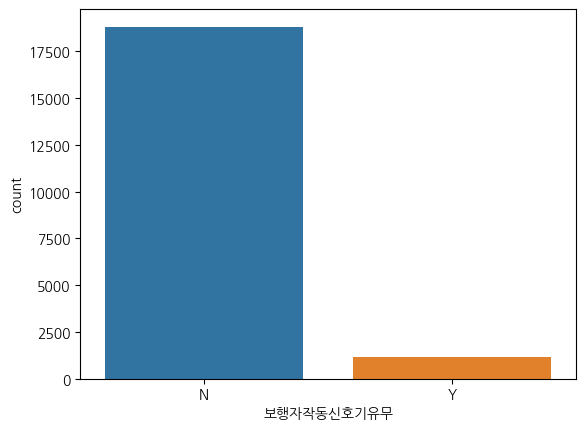

In [248]:
idx = cw2[cw2['보행자작동신호기유무']==' '].index
cw4 = cw2.drop(idx)
sns.countplot(data = cw4, x='보행자작동신호기유무')

신호등의 음향신호기 설치 여부를 시각화.

<AxesSubplot:xlabel='음향신호기설치여부', ylabel='count'>

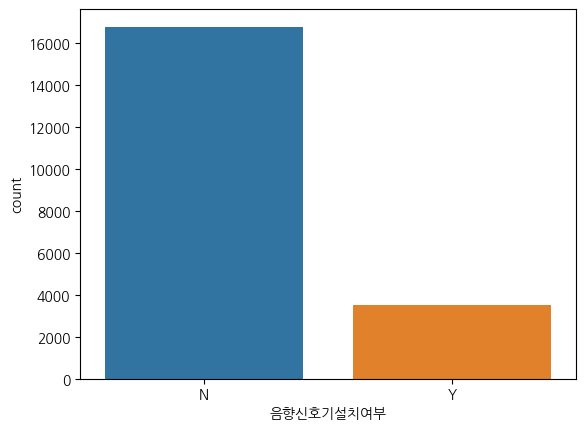

In [249]:
idx = cw2[cw2['음향신호기설치여부']==' '].index
cw5 = cw2.drop(idx)
sns.countplot(data = cw5, x='음향신호기설치여부')

녹색신호시간의 분포를 시각화. 이 역시 극단적으로 큰 값과 0인 값을 제거하고 시각화함.

In [286]:
cw_gn = cw2[['녹색신호시간']]
cw_gn = cw_gn.dropna(axis = 0)

<AxesSubplot:>

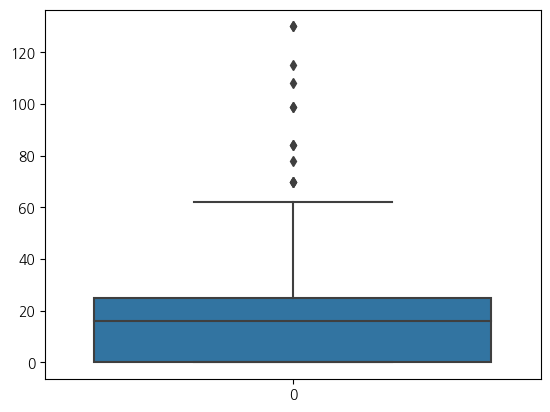

In [287]:
sns.boxplot(data = cw_gn['녹색신호시간'])

In [288]:
cw_gn = cw_gn[cw_gn['녹색신호시간'] > 0]
cw_gn = cw_gn[cw_gn['녹색신호시간'] < 80]

D:\rl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='녹색신호시간', ylabel='Density'>

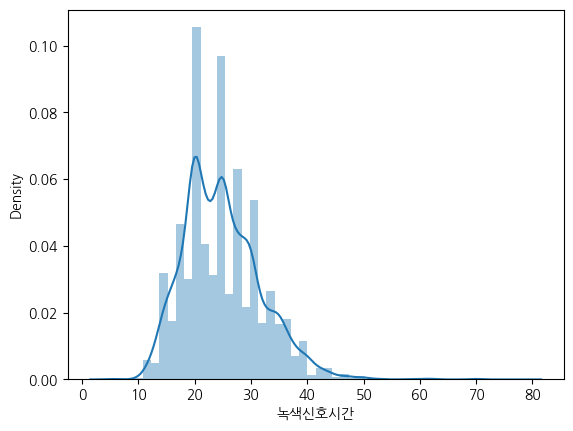

In [289]:
sns.distplot(cw_gn['녹색신호시간'])

신호등의 적색신호시간 시각화. 이 역시 극단적으로 큰 값과 0인 값을 제거하고 시각화함.

In [290]:
cw_rd = cw2[['적색신호시간']]
cw_rd = cw_rd.dropna(axis = 0)

In [291]:
cw_rd.describe()

,적색신호시간
count,11246.000000
mean,59.760333
std,218.604839
min,0.000000
25%,0.000000
50%,0.000000
75%,109.000000
max,9999.000000


In [292]:
cw_rd = cw_rd[cw_rd['적색신호시간'] > 0]
cw_rd = cw_rd[cw_rd['적색신호시간'] < 600]

D:\rl\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='적색신호시간', ylabel='Density'>

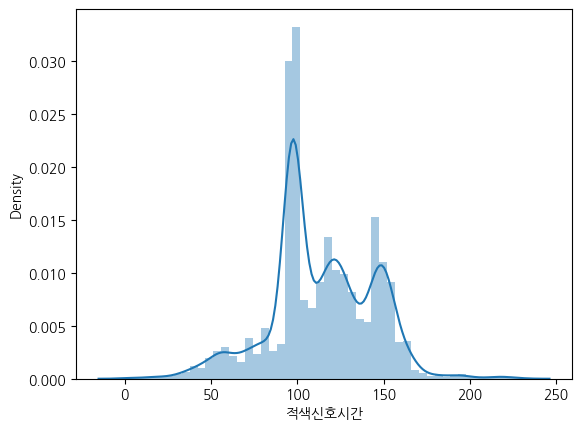

In [293]:
sns.distplot(cw_rd['적색신호시간'])

횡단보도 내 교통섬 존재 유무를 시각화.

<AxesSubplot:xlabel='교통섬유무', ylabel='count'>

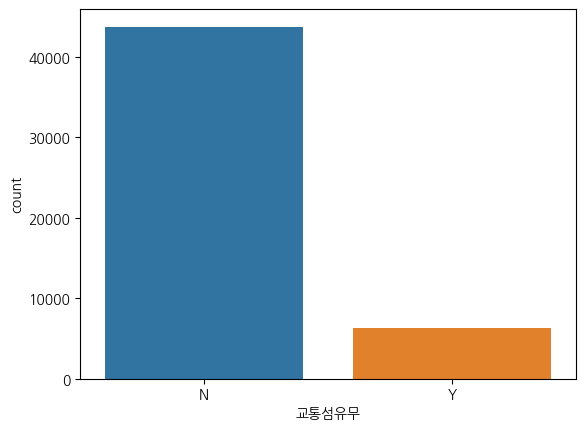

In [270]:
sns.countplot(data = cw2, x='교통섬유무')

횡단보도 내 보도턱 낮춤 여부를 시각화.

<AxesSubplot:xlabel='보도턱낮춤여부', ylabel='count'>

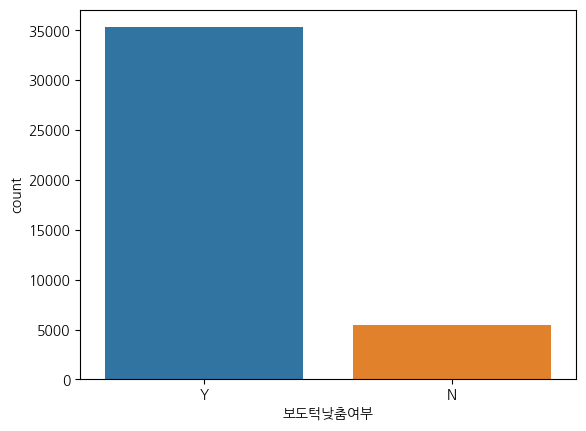

In [269]:
idx = cw2[cw2['보도턱낮춤여부']==' '].index
cw6 = cw2.drop(idx)
sns.countplot(data = cw6, x='보도턱낮춤여부')

횡단보도 내 점자블록 설치 여부를 시각화.

<AxesSubplot:xlabel='점자블록유무', ylabel='count'>

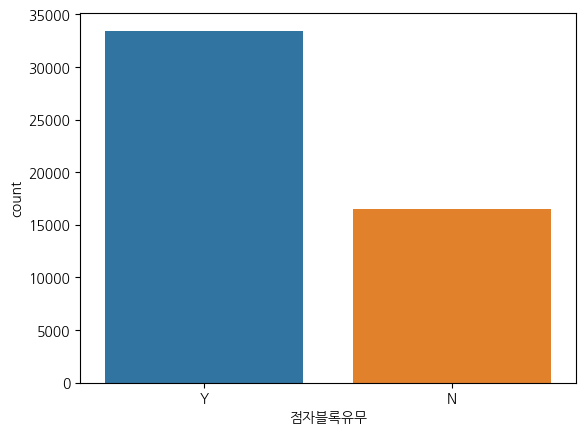

In [271]:
sns.countplot(data = cw2, x='점자블록유무')

자동차 이용자가 보행자를 쉽게 식별할 수 있도록 설치한 조명시설의 유무를 시각화.

<AxesSubplot:xlabel='집중조명시설유무', ylabel='count'>

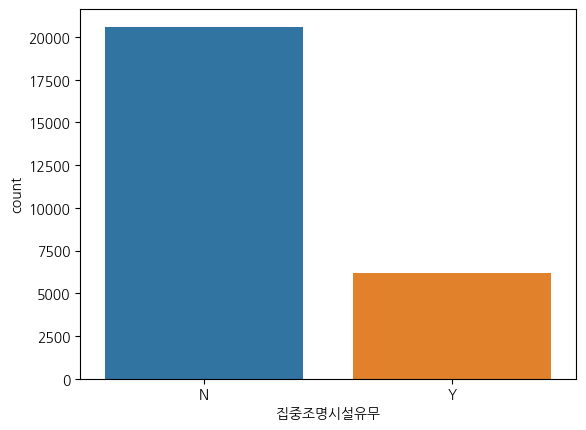

In [273]:
idx = cw2[cw2['집중조명시설유무']==' '].index
cw7 = cw2.drop(idx)
sns.countplot(data = cw7, x='집중조명시설유무')